In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [389]:
# Load the dataset
file_path = 'Life_Expectancy_Data.csv'
data = pd.read_csv(file_path)

In [391]:
# Display basic information and first few rows of the dataset
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [393]:
data_info, data_head

(None,
        Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing              65.0            263.0   
 1  Afghanistan  2014  Developing              59.9            271.0   
 2  Afghanistan  2013  Developing              59.9            268.0   
 3  Afghanistan  2012  Developing              59.5            272.0   
 4  Afghanistan  2011  Developing              59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0             62     0.01               71.279624         65.0      1154  ...   
 1             64     0.01               73.523582         62.0       492  ...   
 2             66     0.01               73.219243         64.0       430  ...   
 3             69     0.01               78.184215         67.0      2787  ...   
 4             71     0.01                7.097109         68.0      3013  ...   
 
    Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP 

In [395]:
# Define a function to categorize the population size into ranges
def categorize_population_size(population):
    if pd.isna(population):
        return 'Unknown'
    elif 1000 <= population < 30000:
        return 'Small'
    elif 30000 <= population < 100000:
        return 'Medium'
    elif population >= 100000:
        return 'Large'
    else:
        return 'Unknown'

In [397]:
# Apply the function to create a new feature
data['Population Range'] = data['Population'].apply(categorize_population_size)

In [399]:
# Display the distribution of the new feature and the first few rows
population_range_distribution = data['Population Range'].value_counts()
updated_data_head = data[['Country', 'Year', 'Population', 'Population Range']].head()

population_range_distribution, updated_data_head

(Population Range
 Large      1874
 Unknown     683
 Small       205
 Medium      176
 Name: count, dtype: int64,
        Country  Year  Population Population Range
 0  Afghanistan  2015  33736494.0            Large
 1  Afghanistan  2014    327582.0            Large
 2  Afghanistan  2013  31731688.0            Large
 3  Afghanistan  2012   3696958.0            Large
 4  Afghanistan  2011   2978599.0            Large)

In [401]:
# Define a function to create a lifestyle category based on Alcohol consumption and BMI
def categorize_lifestyle(row):
    alcohol = row['Alcohol']
    bmi = row[' BMI ']
    
    # Column has leading/trailing spaces based on the original dataset

    if pd.isna(alcohol) or pd.isna(bmi):
        return 'Unknown'
    elif alcohol < 2.5 and bmi < 18.5:
        return 'Low Risk - Lean/Low Alcohol'
    elif alcohol < 2.5 and bmi >= 18.5:
        return 'Moderate - Lean/Low Alcohol'
    elif alcohol >= 2.5 and bmi < 25:
        return 'Moderate - Fit/Moderate Alcohol'
    elif alcohol >= 2.5 and bmi >= 25:
        return 'High Risk - Overweight/High Alcohol'
    else:
        return 'Other'

In [403]:
# Apply the function to create the new feature
data['Lifestyle'] = data.apply(categorize_lifestyle, axis=1)

In [405]:
# Display the distribution of the new feature and the first few rows
lifestyle_distribution = data['Lifestyle'].value_counts()
updated_lifestyle_data = data[['Country', 'Year', 'Alcohol', ' BMI ', 'Lifestyle']].head()

In [407]:
lifestyle_distribution, updated_lifestyle_data

(Lifestyle
 High Risk - Overweight/High Alcohol    1210
 Moderate - Lean/Low Alcohol             746
 Moderate - Fit/Moderate Alcohol         397
 Low Risk - Lean/Low Alcohol             374
 Unknown                                 211
 Name: count, dtype: int64,
        Country  Year  Alcohol   BMI                     Lifestyle
 0  Afghanistan  2015     0.01   19.1  Moderate - Lean/Low Alcohol
 1  Afghanistan  2014     0.01   18.6  Moderate - Lean/Low Alcohol
 2  Afghanistan  2013     0.01   18.1  Low Risk - Lean/Low Alcohol
 3  Afghanistan  2012     0.01   17.6  Low Risk - Lean/Low Alcohol
 4  Afghanistan  2011     0.01   17.2  Low Risk - Lean/Low Alcohol)

In [409]:
# Define a function to create an economy category based on Population and GDP
def categorize_economy(row):
    population = row['Population']
    gdp = row['GDP']

    if pd.isna(population) or pd.isna(gdp):
        return 'Unknown'
    elif population < 100000 and gdp < 10000:
        return 'Small Economy - Low GDP'
    elif population >= 100000 and gdp < 10000:
        return 'Large Population - Low GDP'
    elif population >= 100000 and gdp >= 10000:
        return 'Strong Economy - High GDP'
    elif population < 100000 and gdp >= 10000:
        return 'Small but High GDP'
    else:
        return 'Other'

In [411]:
# Apply the function to create the new feature
data['Economy'] = data.apply(categorize_economy, axis=1)

In [413]:
# Display the distribution of the new feature and the first few rows
economy_distribution = data['Economy'].value_counts()
updated_economy_data = data[['Country', 'Year', 'Population', 'GDP', 'Economy']].head()

economy_distribution, updated_economy_data

(Economy
 Large Population - Low GDP    1584
 Unknown                        674
 Small Economy - Low GDP        341
 Strong Economy - High GDP      273
 Small but High GDP              66
 Name: count, dtype: int64,
        Country  Year  Population         GDP                     Economy
 0  Afghanistan  2015  33736494.0  584.259210  Large Population - Low GDP
 1  Afghanistan  2014    327582.0  612.696514  Large Population - Low GDP
 2  Afghanistan  2013  31731688.0  631.744976  Large Population - Low GDP
 3  Afghanistan  2012   3696958.0  669.959000  Large Population - Low GDP
 4  Afghanistan  2011   2978599.0   63.537231  Large Population - Low GDP)

In [415]:
# Calculate the death ratio as the ratio between Adult Mortality and infant deaths
# To avoid division by zero, handle cases where infant deaths are 0
def calculate_death_ratio(row):
    if row['infant deaths'] == 0 or pd.isna(row['Adult Mortality']):
        return 'Undefined'
    return row['Adult Mortality'] / row['infant deaths']

In [417]:
# Apply the function to calculate the death ratio
data['Death Ratio'] = data.apply(calculate_death_ratio, axis=1)

In [419]:
# Display basic statistics and the first few rows of the new feature
death_ratio_stats = data['Death Ratio'].value_counts()
updated_death_ratio_data = data[['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Death Ratio']].head()

death_ratio_stats.head(), updated_death_ratio_data

(Death Ratio
 Undefined    848
 4.0           13
 11.0          11
 12.0           9
 66.0           9
 Name: count, dtype: int64,
        Country  Year  Adult Mortality  infant deaths Death Ratio
 0  Afghanistan  2015            263.0             62    4.241935
 1  Afghanistan  2014            271.0             64    4.234375
 2  Afghanistan  2013            268.0             66    4.060606
 3  Afghanistan  2012            272.0             69    3.942029
 4  Afghanistan  2011            275.0             71    3.873239)

In [421]:
# Step 1: Handle missing values - Impute numeric columns using their mean
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda col: col.fillna(col.mean()), axis=0)

In [423]:
# Step 2: Handle categorical missing values (if any) - Replace with 'Unknown' for simplicity
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna('Unknown'), axis=0)

In [425]:
# Step 3: Generate scatter plots between predictors and the target variable (Life expectancy)
predictors = [col for col in data.columns if col not in ['Life expectancy ', 'Country', 'Year']]

In [427]:
# Convert non-numeric values in 'Death Ratio' to NaN
data['Death Ratio'] = pd.to_numeric(data['Death Ratio'], errors='coerce')

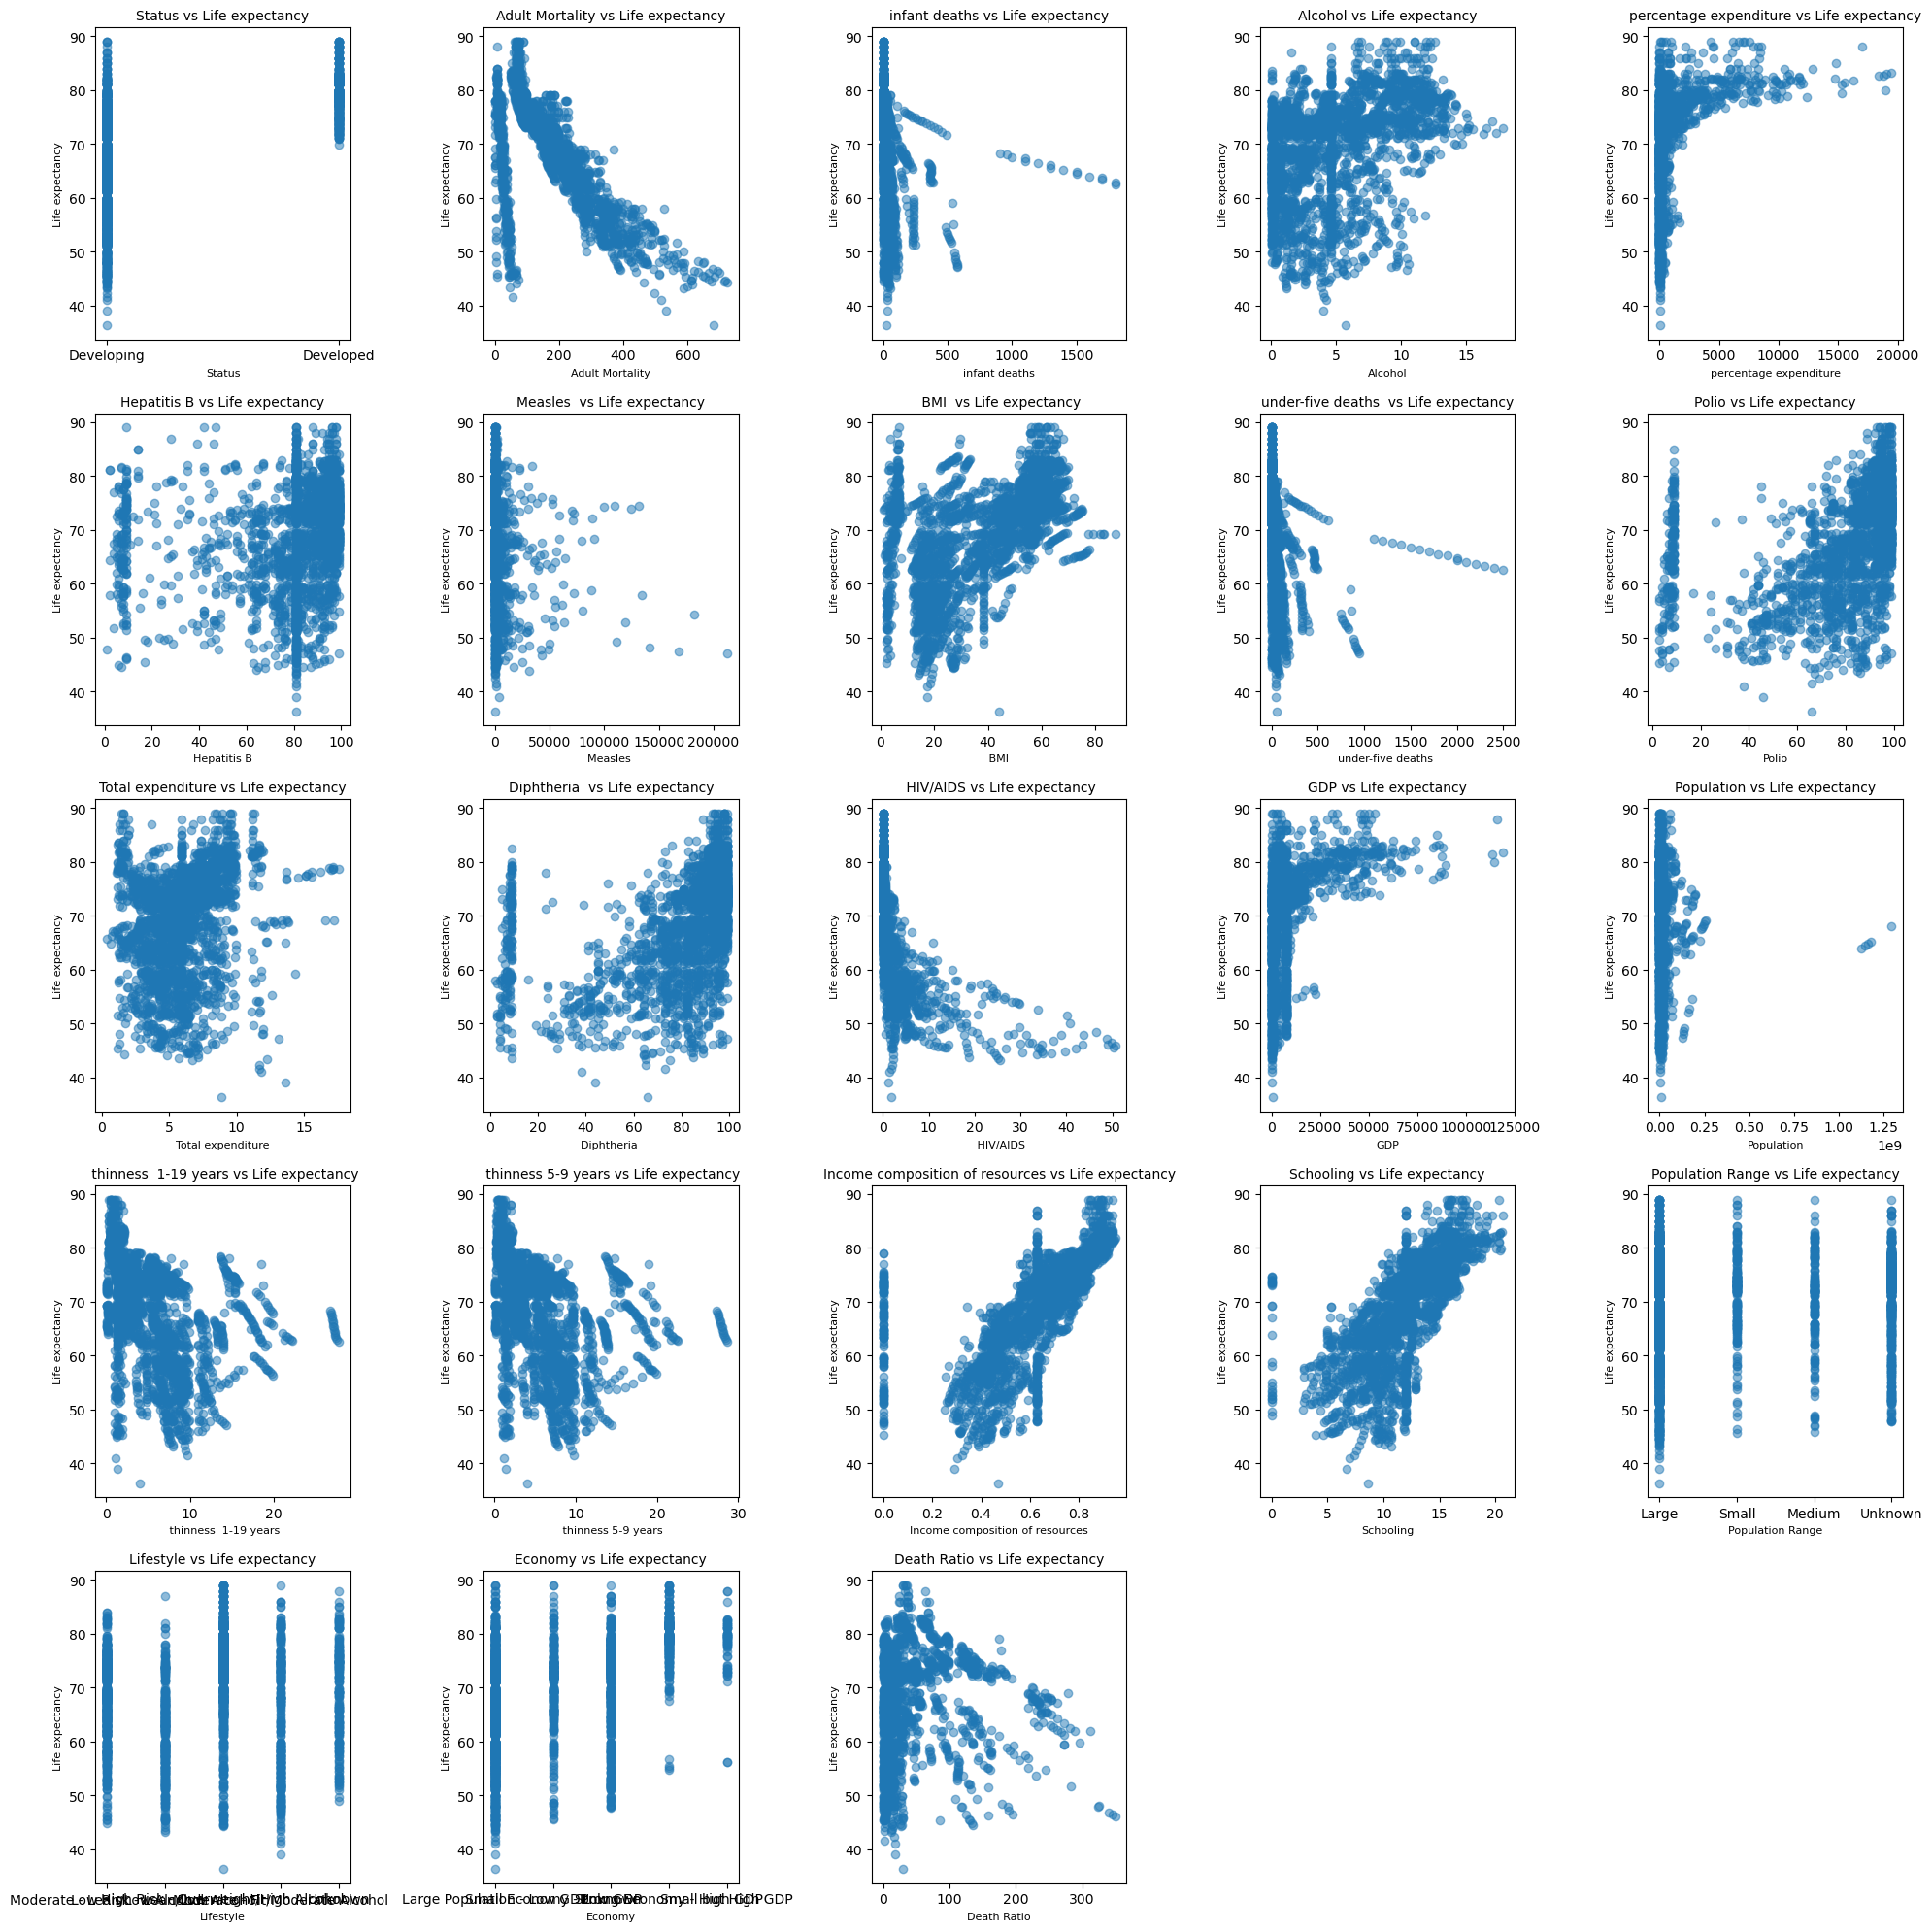

In [429]:
# Re-plot the scatter plots between each predictor and the target variable
plt.figure(figsize=(20, 20))
for i, predictor in enumerate(predictors):
    plt.subplot(5, 5, i + 1)  # Adjust layout based on the number of predictors
    plt.scatter(data[predictor], data['Life expectancy '], alpha=0.5)
    plt.xlabel(predictor, fontsize=8)
    plt.ylabel('Life expectancy', fontsize=8)
    plt.title(f'{predictor} vs Life expectancy', fontsize=10)

plt.tight_layout()
plt.show()

In [430]:
# Compute the correlation matrix for numeric columns only
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

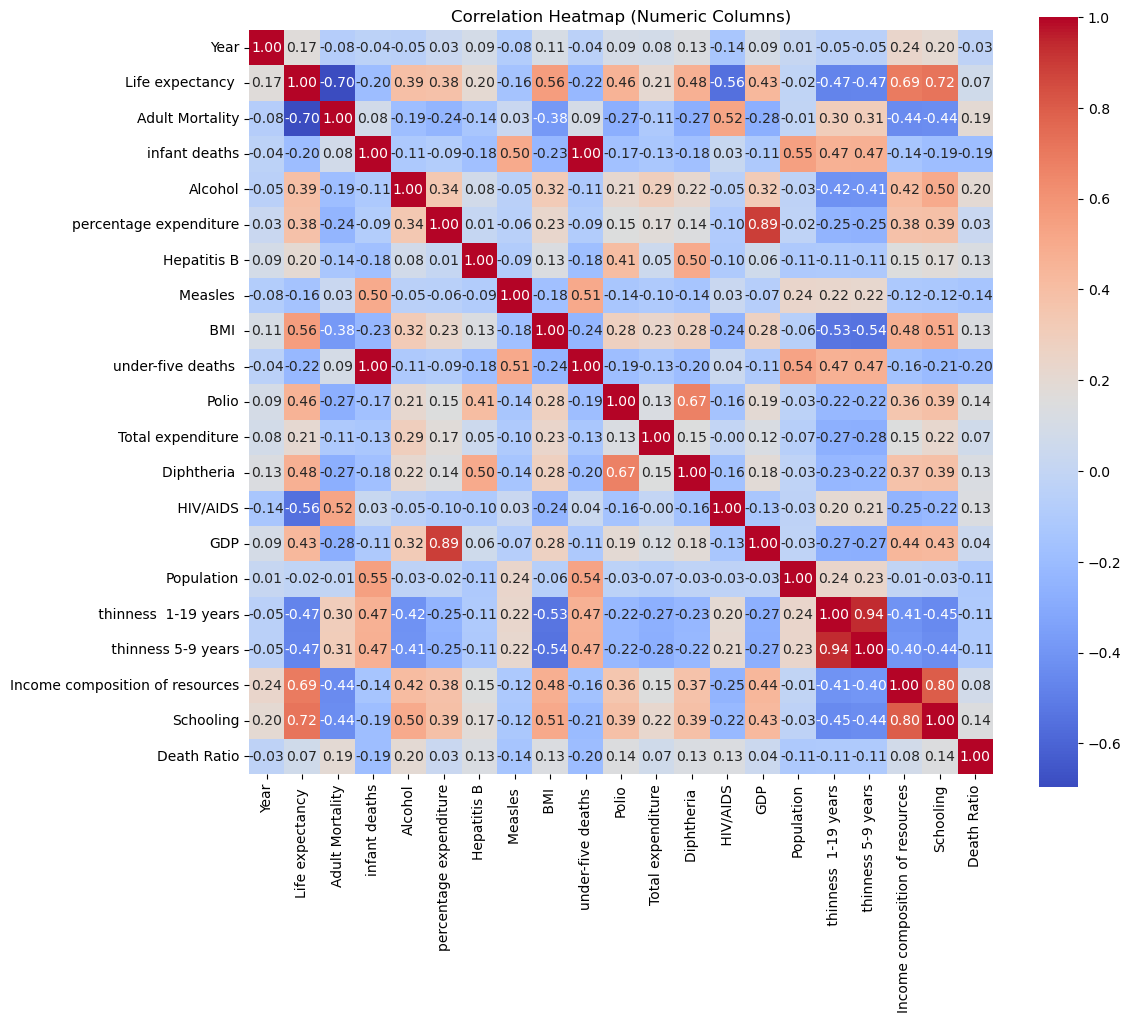

In [431]:
# Generate a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

In [432]:
# Defining the threshold 
threshold = 0.75

In [433]:
# Identify pairs with correlation above the threshold (excluding self-correlation)
high_correlation_pairs = [(col1, col2) for col1 in correlation_matrix.columns 
                          for col2 in correlation_matrix.columns 
                          if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

In [434]:
# Drop columns to reduce multicollinearity
columns_to_drop = set()
for col1, col2 in high_correlation_pairs:
    columns_to_drop.add(col2)

In [435]:
# Drop the highly correlated columns and display the results
cleaned_data = data.drop(columns=list(columns_to_drop))

columns_to_drop, cleaned_data.shape

({' thinness  1-19 years',
  ' thinness 5-9 years',
  'GDP',
  'Income composition of resources',
  'Schooling',
  'infant deaths',
  'percentage expenditure',
  'under-five deaths '},
 (2938, 18))

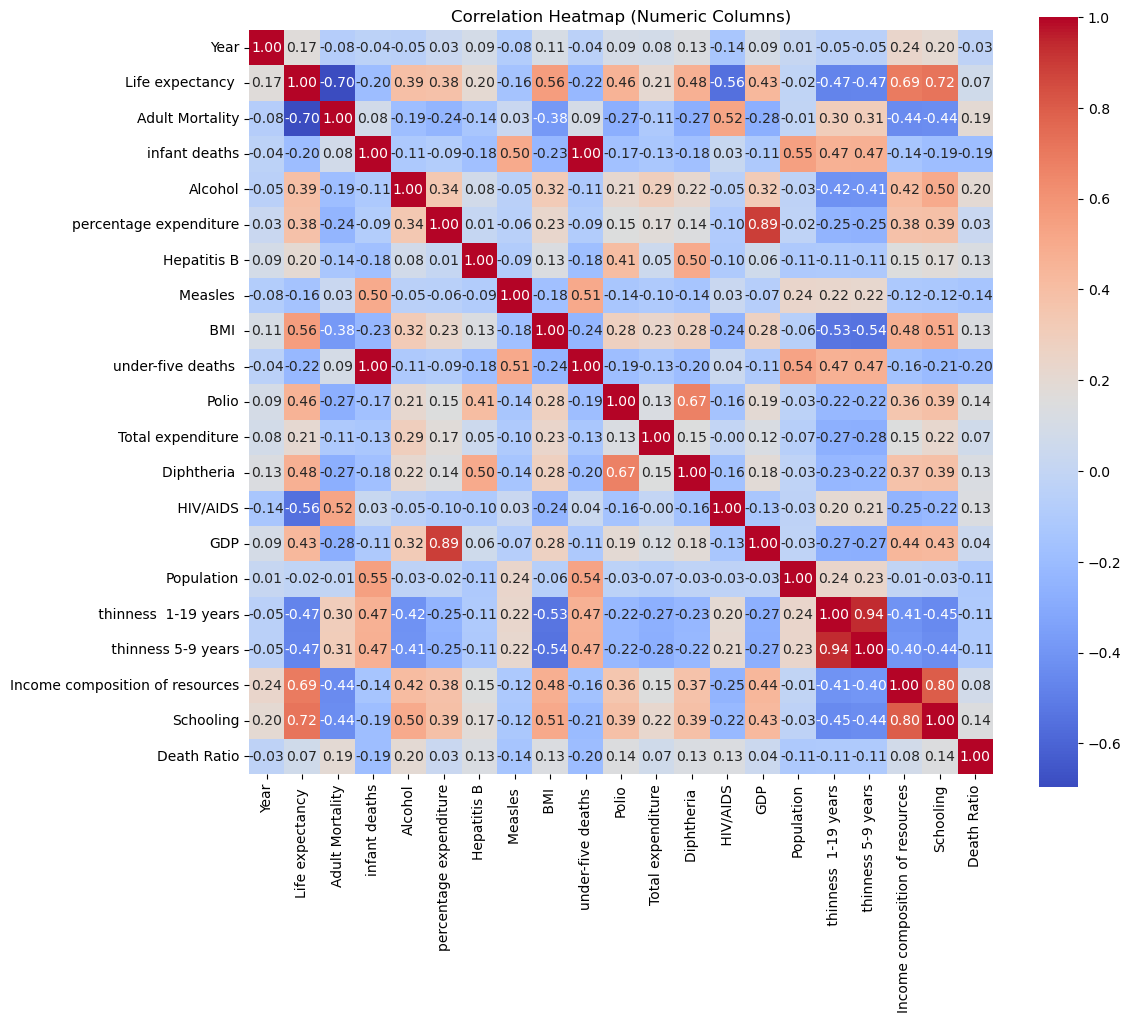

In [436]:
# Generate a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

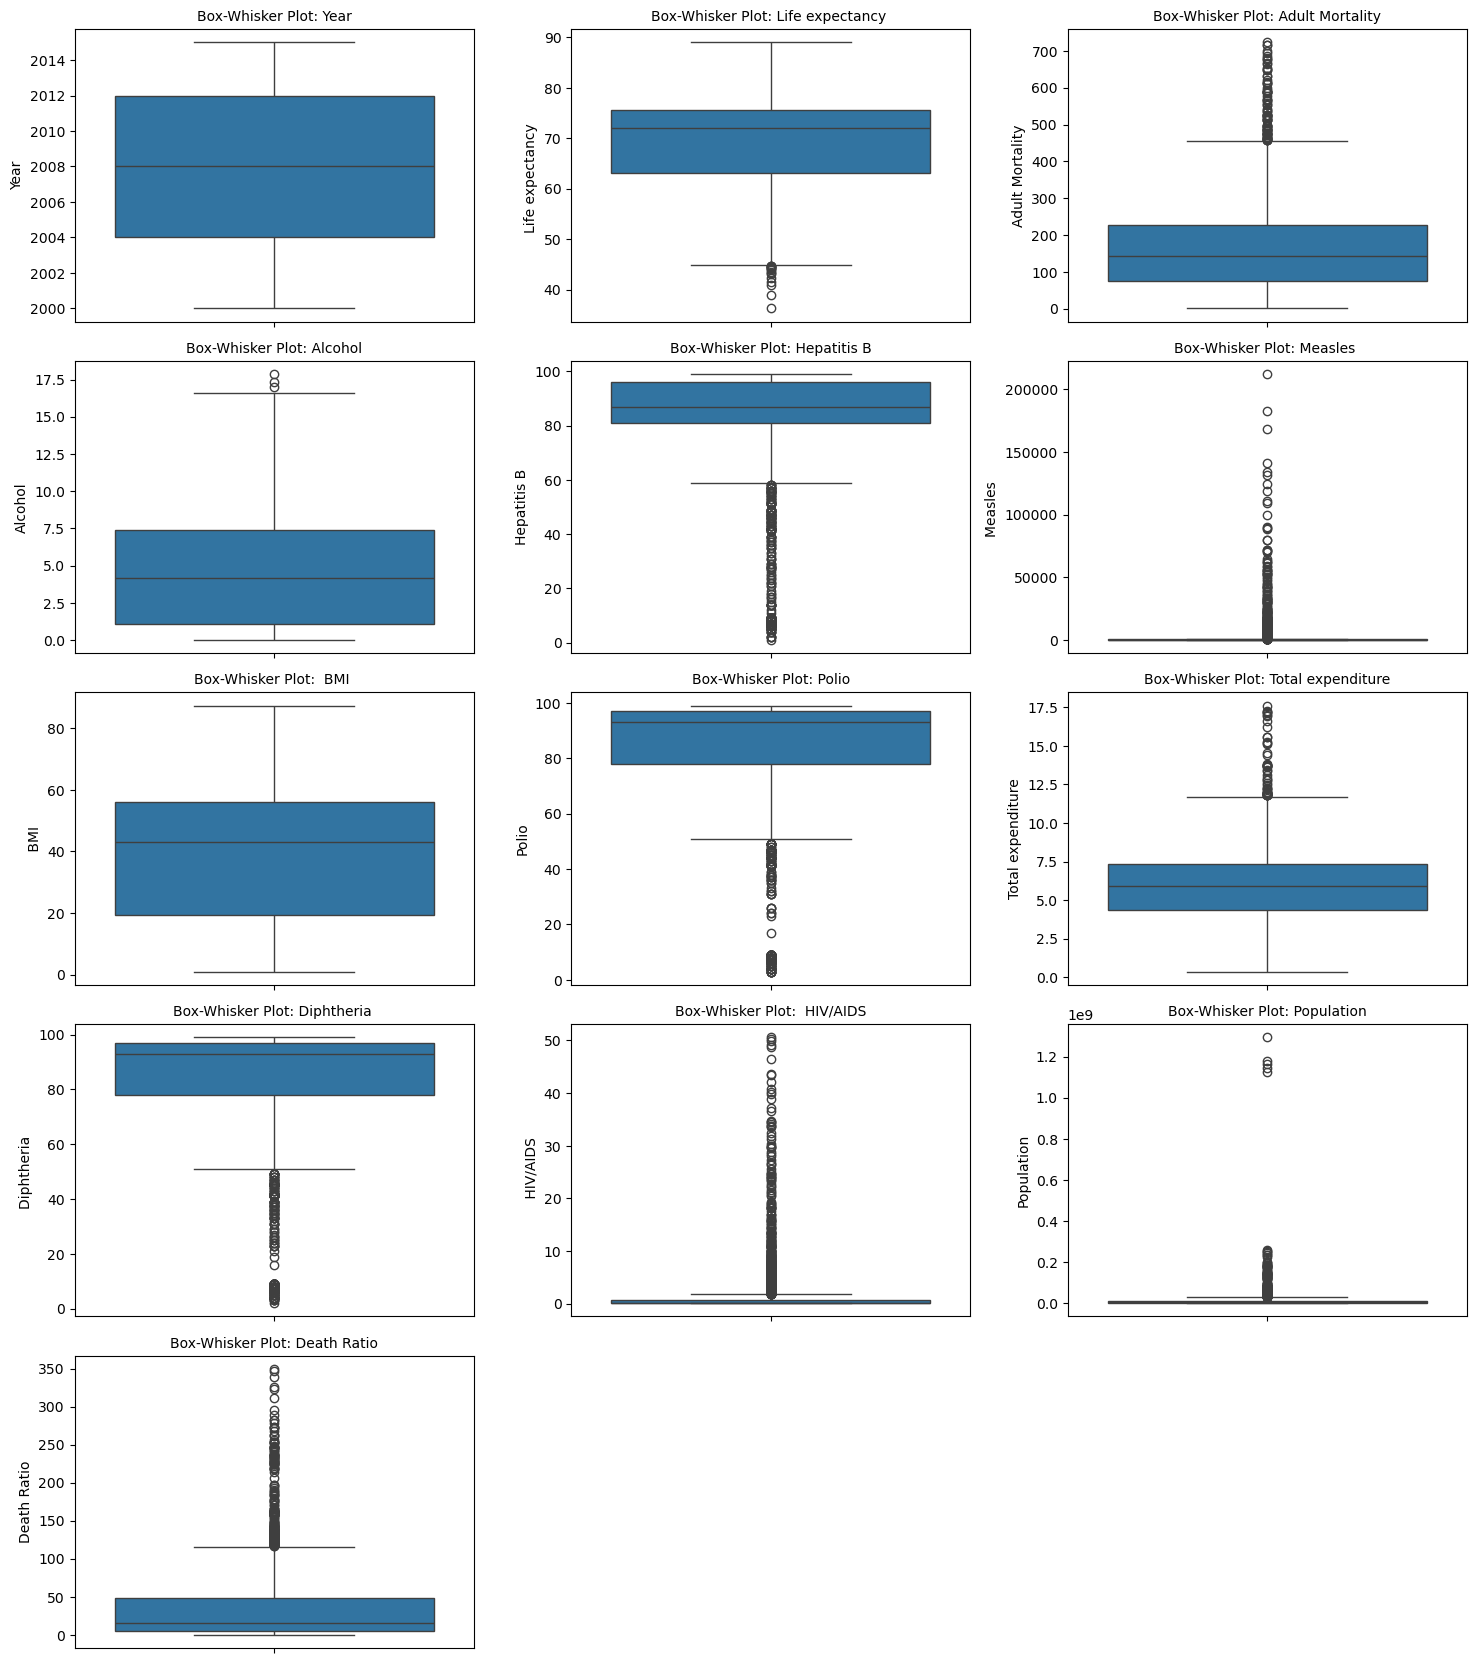

In [437]:
# Generate box-whisker plots for all numeric columns to visualize potential outliers
plt.figure(figsize=(15, 20))
for i, column in enumerate(cleaned_data.select_dtypes(include=[np.number]).columns):
    plt.subplot(6, 3, i + 1)  # Adjusting layout based on the number of columns
    sns.boxplot(y=cleaned_data[column])
    plt.title(f'Box-Whisker Plot: {column}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [438]:
# Convert 'Life expectancy ' column to a cleaner name for analysis
cleaned_data = cleaned_data.rename(columns={'Life expectancy ': 'Life_expectancy', 'Total expenditure': 'Healthcare_expenditure'})

In [441]:
# Analysis 1: Healthcare expenditure vs life expectancy (for countries with life expectancy < 65)
low_life_expectancy = cleaned_data[cleaned_data['Life_expectancy'] < 65]
healthcare_model = sm.OLS(low_life_expectancy['Life_expectancy'], sm.add_constant(low_life_expectancy['Healthcare_expenditure'])).fit()

In [442]:
# Analysis 2: Schooling vs life expectancy
if 'Schooling' in cleaned_data.columns:
    schooling_model = sm.OLS(cleaned_data['Life_expectancy'], sm.add_constant(cleaned_data['Schooling'])).fit()

In [443]:
# Analysis 3: Alcohol consumption vs life expectancy
alcohol_model = sm.OLS(cleaned_data['Life_expectancy'], sm.add_constant(cleaned_data['Alcohol'])).fit()

In [444]:
# Analysis 4: Population density (approximated using Population) vs life expectancy
population_model = sm.OLS(cleaned_data['Life_expectancy'], sm.add_constant(cleaned_data['Population'])).fit()

In [449]:
# Display summaries for each regression model
summary_healthcare = healthcare_model.summary()
summary_alcohol = alcohol_model.summary()
summary_population = population_model.summary()

In [451]:
# Handling case where 'Schooling' was dropped
if 'Schooling' in locals():
    summary_schooling = schooling_model.summary()
else:
    summary_schooling = "Schooling variable was excluded due to multicollinearity."

summary_healthcare, summary_schooling, summary_alcohol, summary_population

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:        Life_expectancy   R-squared:                       0.023
 Model:                            OLS   Adj. R-squared:                  0.022
 Method:                 Least Squares   F-statistic:                     19.71
 Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.02e-05
 Time:                        17:20:47   Log-Likelihood:                -2666.1
 No. Observations:                 851   AIC:                             5336.
 Df Residuals:                     849   BIC:                             5346.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------

In [452]:
# Prepare data for regression
X = cleaned_data.drop(columns=['Life_expectancy', 'Country', 'Year'])
y = cleaned_data['Life_expectancy']

In [453]:
# Encode the 'Status' column (Developed/Developing)
label_encoder = LabelEncoder()
X['Status'] = label_encoder.fit_transform(X['Status'])

In [455]:
# Encode the remaining categorical columns
for col in ['Population Range', 'Lifestyle', 'Economy']:
    X[col] = label_encoder.fit_transform(X[col])

In [456]:
# There are NaN values in the dataset after encoding. We will handle them by imputing the mean before training.
X = X.fillna(X.mean())

In [457]:
# Re-split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr_model = LinearRegression().fit(X_train, y_train)

In [458]:
# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
y_all_pred = lr_model.predict(X)

In [459]:
# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
overall_rmse = np.sqrt(mean_squared_error(y, y_all_pred))

train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
overall_mape = mean_absolute_percentage_error(y, y_all_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
overall_r2 = r2_score(y, y_all_pred)

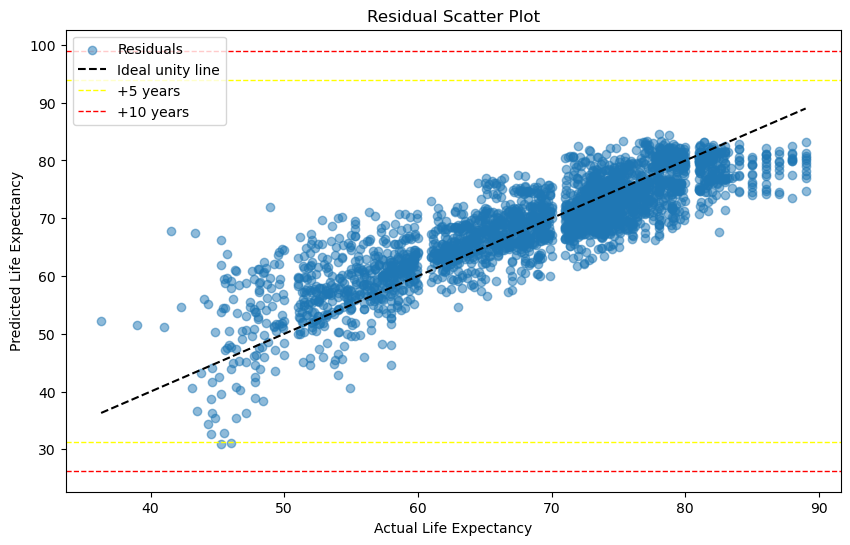

In [475]:
# Plot residual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_all_pred, alpha=0.5, label='Residuals')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='black', label='Ideal unity line')
plt.axhline(y.max() + 5, color='yellow', linestyle='--', linewidth=1, label='+5 years')
plt.axhline(y.min() - 5, color='yellow', linestyle='--', linewidth=1)
plt.axhline(y.max() + 10, color='red', linestyle='--', linewidth=1, label='+10 years')
plt.axhline(y.min() - 10, color='red', linestyle='--', linewidth=1)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.title('Residual Scatter Plot')
plt.show()

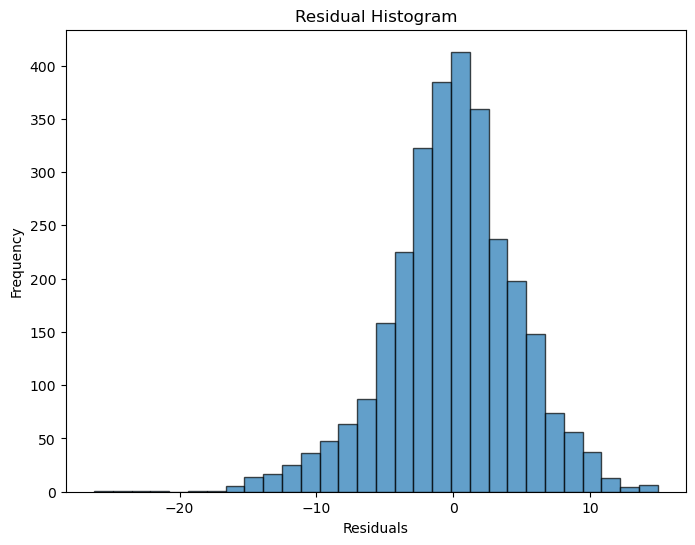

In [477]:
# Plot residual histogram
plt.figure(figsize=(8, 6))
plt.hist(y - y_all_pred, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [479]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=kf)
cv_rmse_scores = np.sqrt(-cv_scores)

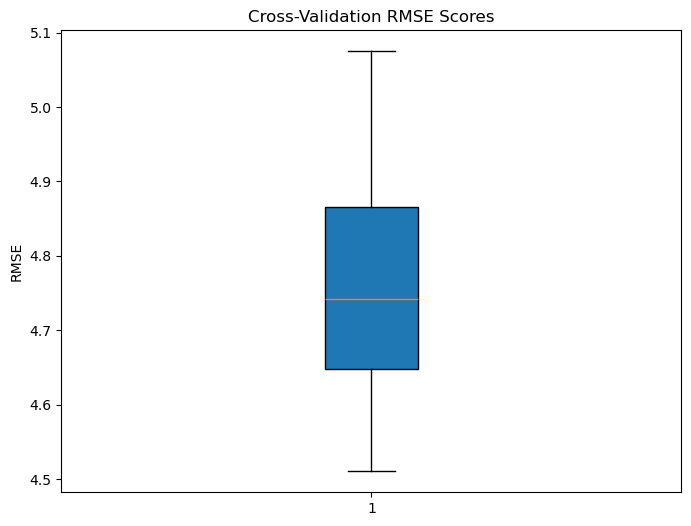

In [481]:
# Box plot for cross-validation RMSE scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_rmse_scores, vert=True, patch_artist=True)
plt.title('Cross-Validation RMSE Scores')
plt.ylabel('RMSE')
plt.show()

In [483]:
# Display performance metrics
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Overall RMSE:", overall_rmse)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)
print("Overall MAPE:", overall_mape)
print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Overall R2:", overall_r2)
print("Mean CV RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation CV RMSE:", np.std(cv_rmse_scores))

Train RMSE: 4.742040890619322
Test RMSE: 4.745098252984245
Overall RMSE: 4.742805936377195
Train MAPE: 0.05472031121710752
Test MAPE: 0.054919888069883536
Overall MAPE: 0.05477023939504842
Train R2: 0.751299241200772
Test R2: 0.7499121572484525
Overall R2: 0.7510723780048068
Mean CV RMSE: 4.76550906985665
Standard Deviation CV RMSE: 0.16241093756075087


In [487]:
# Recursive Feature Elimination with Linear Regression
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1, step=1)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [489]:
# Get feature rankings and order them
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Support': rfe.support_
}).sort_values(by='Ranking')

In [491]:
# Evaluate subsets of features based on rankings
best_subset_results = []

In [493]:
# Incrementally add features starting from the most important and evaluate RMSE with cross-validation
for num_features in range(1, len(X.columns) + 1):
    selected_features = feature_ranking['Feature'][:num_features].values
    X_subset = X[selected_features]
    cv_scores_subset = cross_val_score(lr_model, X_subset, y, scoring='neg_mean_squared_error', cv=kf)
    subset_rmse = np.sqrt(-cv_scores_subset)
    within_error_band = np.mean(subset_rmse) <= 5  # Check if RMSE within 5 years band
    best_subset_results.append({
        'Num_Features': num_features,
        'Features': selected_features,
        'Mean_CV_RMSE': np.mean(subset_rmse),
        'Within_Error_Band': within_error_band
    })

In [495]:
# Convert to DataFrame for easy visualization
best_subset_df = pd.DataFrame(best_subset_results)

In [497]:
# Find the minimum number of features meeting the criteria
optimal_features = best_subset_df[best_subset_df['Within_Error_Band']].sort_values(by='Num_Features').iloc[0]

optimal_features, optimal_features['Features']

(Num_Features                                                        11
 Features             [Status,  HIV/AIDS, Lifestyle, Economy, Alcoho...
 Mean_CV_RMSE                                                  4.871798
 Within_Error_Band                                                 True
 Name: 10, dtype: object,
 array(['Status', ' HIV/AIDS', 'Lifestyle', 'Economy', 'Alcohol', ' BMI ',
        'Diphtheria ', 'Population Range', 'Polio',
        'Healthcare_expenditure', 'Adult Mortality'], dtype=object))